In [59]:
import os
import math
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
x_train = []
y_train = []
for file in os.listdir("languageID"):
    with open("languageID/"+file) as f:
        y_train.append(file[0])
        file_enc = []
        lines = f.readlines()
        for s in lines:
            for char in s:
                if char == "\n":
                    continue
                file_enc.append(char)
        x_train.append(file_enc)
len(x_train)

60

In [3]:
x_train_1 = x_train[:10] + x_train[20:30] + x_train[40:50]
y_train_1 = y_train[:10] + y_train[20:30] + y_train[40:50]

In [4]:
def prior_prob(label, x, y, alpha):
    count = 0
    for i in range(len(x)):
        if y[i] == label:
            count += 1
    return (count+alpha)/(len(x)+3*alpha)        

In [5]:
#q4.1
print(prior_prob("e", x_train_1, y_train_1, 0.5))
print(prior_prob("j", x_train_1, y_train_1, 0.5))
print(prior_prob("s", x_train_1, y_train_1, 0.5))

0.3333333333333333
0.3333333333333333
0.3333333333333333


In [6]:
def cond_prob(char, label, x, y, alpha):
    count_x = 0
    count_y = 0
    for i in range(len(x)):
        if y[i] == label:
            count_y += len(x[i])
            for c in x[i]:
                if c == char:
                    count_x += 1
    return (count_x+alpha)/(count_y+3*alpha) 

In [7]:
#q4.2
theta_e = []
for i in [chr(x) for x in range(ord('a'), ord('z')+1)]+[" "]:
    theta_e.append(cond_prob(i, "e",  x_train_1, y_train_1, 0.5))
print(theta_e)

[0.06164400403255551, 0.01202390026801741, 0.0216626914849148, 0.02195775652216676, 0.10752661732523544, 0.020187366298654995, 0.014482775578450418, 0.047874302294130665, 0.052447810371536056, 0.000614718827608252, 0.004303031793257764, 0.03105559517076889, 0.022793774127713985, 0.05598859081855959, 0.06636504462858689, 0.01551550320883228, 0.0007622513462342325, 0.04880867491209521, 0.06228331161326809, 0.0868228872113895, 0.02500676190710369, 0.00897489488308048, 0.016154810789544862, 0.0010573163834861935, 0.013450047948068554, 0.0005163638151909316, 0.18030932651405246]


In [8]:
#q4.3
theta_j = []
theta_s = []
for i in [chr(x) for x in range(ord('a'), ord('z')+1)]+[" "]:
    theta_j.append(cond_prob(i, "j",  x_train_1, y_train_1, 0.5))
    theta_s.append(cond_prob(i, "s",  x_train_1, y_train_1, 0.5))
print(theta_j)
print(theta_s)

[0.13178294573643412, 0.009117918246081344, 0.005702967592118294, 0.015947819554007446, 0.06000068299013079, 0.0032442031212648976, 0.016152716593245228, 0.031178499470682648, 0.10043369873305331, 0.0022880169381552435, 0.05706382542772257, 0.0009220366765700235, 0.04121845439333402, 0.05603934023153365, 0.0899156507188471, 0.0009903356896492845, 3.41495065396305e-05, 0.04347232182494963, 0.04155994945873032, 0.059454290885496704, 0.06922104975583103, 0.0001707475326981525, 0.020523853430317932, 3.41495065396305e-05, 0.014103746200867398, 0.007410442919099819, 0.12283577502305092]
[0.10355135328329597, 0.010299899275432954, 0.03648828670760633, 0.04220684277220002, 0.11498846541248335, 0.007245670468206778, 0.006725801735061897, 0.004971244760697924, 0.05032979172758879, 0.006400883776846346, 0.0002274425707508854, 0.05110959482730611, 0.02446632225363096, 0.05572342983396692, 0.0703447379536667, 0.025116158170062058, 0.008090457159567209, 0.05780290476654645, 0.06768041069629918, 0.03

In [44]:
#q4.4
x10 = x_train[10]
x = [0]*27
for char in x10:
    if char == ' ':
        x[26] += 1
        continue
    x[ord(char)-ord('a')] += 1
print(x)

[126, 16, 31, 37, 166, 32, 21, 57, 98, 0, 7, 57, 43, 100, 90, 29, 0, 84, 105, 118, 46, 15, 24, 3, 23, 1, 302]


In [12]:
def inference(bag, theta):
    logp = 0
    for i in range(len(bag)):
        #print(math.log(theta[i]))
        logp += bag[i] * math.log(theta[i])
    return logp

In [13]:
#q4.5
print("Conditional probability under English is e^"+str(inference(x,theta_e)))
print("Conditional probability under Japanese is e^"+str(inference(x,theta_j)))
print("Conditional probability under Spanish is e^"+str(inference(x,theta_s)))

Conditional probability under English is e^-4597.373906033782
Conditional probability under Japanese is e^-5108.565737840508
Conditional probability under Spanish is e^-4837.575393381252


In [26]:
def NaiveBayes(x,y):
    #apporx log(p(x)) = (logp1+logp2+logp3)/3 since x is small
    logpxe = inference(x,theta_e)
    logpxj = inference(x,theta_j)
    logpxs = inference(x,theta_s)
    logpx = logpxj - math.log(3) + math.log(1+math.exp(logpxe-logpxj)+math.exp(logpxs-logpxj))
    if y == "e":
        logpyx = logpxe + math.log(1/3) - logpx
        return logpyx
    elif y == "j":
        logpyj = logpxj + math.log(1/3) - logpx
        return logpyj
    elif y == "s":
        logpys = logpxs + math.log(1/3) - logpx
        return logpys

In [41]:
def NaiveBayes_cons(x,y):
    #apporx log(p(x)) = (logp1+logp2+logp3)/3 since x is small
    logpxe = inference(x,theta_e)
    logpxj = inference(x,theta_j)
    logpxs = inference(x,theta_s)
    if y == "e":
        logpyx = logpxe + math.log(1/3)
        return logpyx
    elif y == "j":
        logpyj = logpxj + math.log(1/3)
        return logpyj
    elif y == "s":
        logpys = logpxs + math.log(1/3)
        return logpys

In [42]:
def predict(x):
    pred = None
    best = None
    for y in ["e","j","s"]:
        if best == None or NaiveBayes_cons(x,y) > best:
            best = NaiveBayes_cons(x,y)
            pred = y
    return pred

In [45]:
#q4.6
for y in ["e","j","s"]:
    print("p(y="+y+"|x) = e^"+str(NaiveBayes(x,y)))
print("Our prediction is y=" + predict(x))

p(y=e|x) = e^0.0
p(y=j|x) = e^-511.19183180672553
p(y=s|x) = e^-240.20148734747
Our prediction is y=e


In [37]:
x_test = x_train[10:20] + x_train[30:40] + x_train[50:60]
y_test = y_train[10:20] + y_train[30:40] + y_train[50:60]

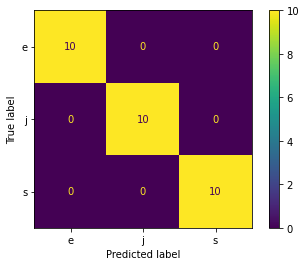

In [58]:
#q4.7
predict_list = []
for test in x_test:
    x_tmp = [0]*27
    for char in test:
        if char == ' ':
            x_tmp[26] += 1
            continue
        x_tmp[ord(char)-ord('a')] += 1
    predict_list.append(predict(x_tmp))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predict_list, labels=["e", "j", "s"]),display_labels= ["e", "j", "s"])
disp.plot()

In [67]:
#q4.8
shuffle_test = x_train[10]
random.shuffle(x_train[10])
x_shuffle = [0]*27
for char in shuffle_test:
    if char == ' ':
        x_shuffle[26] += 1
        continue
    x_shuffle[ord(char)-ord('a')] += 1
print(predict(x_shuffle))
print(predict(x))
print("Shuffling does not affect our prediction. Because we are computing the 'bag-of-characters' vecter, which is free of the order of letters.")

e
e
Shuffling does not affect our prediction. Because we are computing the 'bag-of-characters' vecter, which is free of the order of letters.
